# Initial imports and downloads (if required)

In [325]:
# Numpy
try:
    from numpy import array, linspace
except ImportError:
    %pip install numpy
    from numpy import array, linspace

# Matplotlib
try: 
    import matplotlib.pyplot as plt
except ImportError:
    %pip install matplotlib
    import matplotlib.pyplot as plt

# Ddeint
try:
    from ddeint import ddeint  
except ImportError:
    %pip install ddeint
    from ddeint import ddeint
    # Assuming you're using ddeint for delay differential equations


# Model
The variables still need to be properly described on what type of thing it is

In [326]:
def model(Y, t, delta, tau, beta, mu_max, ks, kla, cgl, mo, Yxo):
    s, xs, xi, p = Y(t)            #mg/L, CFU/L, CFU/L, PFU/L

    #Set constraints
    s = max(s,(0.33*9.077))
    s = min(s,9.077)
    xs = max(xs,0)
    xi = max(xi,0)
    p = max(p,0)

    mu = (mu_max*s)+(ks+s)
    qo = 10*mo
    romax = kla*(cgl-0.33*9.077)
    
    if s > (0.33*9.077):
        romax = 0
        
    if s + romax > 9.077:
        romax = 9.077 - s

    if s <= (9.077*0.33):
        ro = romax
        dxdt = romax/Yxo
    else:
        ro = qo * (xs+xi)
        dxdt = mu*(xs+xi)
    
    # Differential equations with delays
    dsdt = -(ro) + romax
    if s + dsdt <= 0.33*9.077:
        dsdt = ((0.33*9.077)-s)
    dxsdt = (dxdt) - (delta * xs * p)
    dxidt = (delta * xs * p) - ((1/tau) * xi)
    dpdt = (beta *((1/tau)*xi)) - (delta * xs * p)   

    return array([dsdt, dxsdt, dxidt, dpdt])

# Set the initial conditions

In [327]:
# Initial conditions function
g = lambda t: array([9.077, 10**8, 0, 0])
 
# Time range
tt = linspace(0, 400, 1000)  
# tt = linspace(0, 4, 5)  

# Parameters for the system
delta = (1 / (60 * 1000)) * 10**(-9)  # L/(CFU*PFU*min)  Phage adsorption rate
tau = 25                              # min              Tau
beta = 25                             # PFU/CFU          Burst size
mu_max = 0.611 / 60                   # 1/min            Max growth rate
ks = 0.07                             # mg/L              monod constant
kla = 75/60                           # 1/min oxygen mass transfer coefficient
cgl = 9.077                           # mg/L concentration of oxygen in gass at boundary layer
mo = 5.3*10**-13                      # mg/CFU/min oxygen taken up by the bacteria for maintenance
Yxo = 3*10**-11                       # yield of cells on oxygen (mg/CFU)

# Solving the equation and plotting it

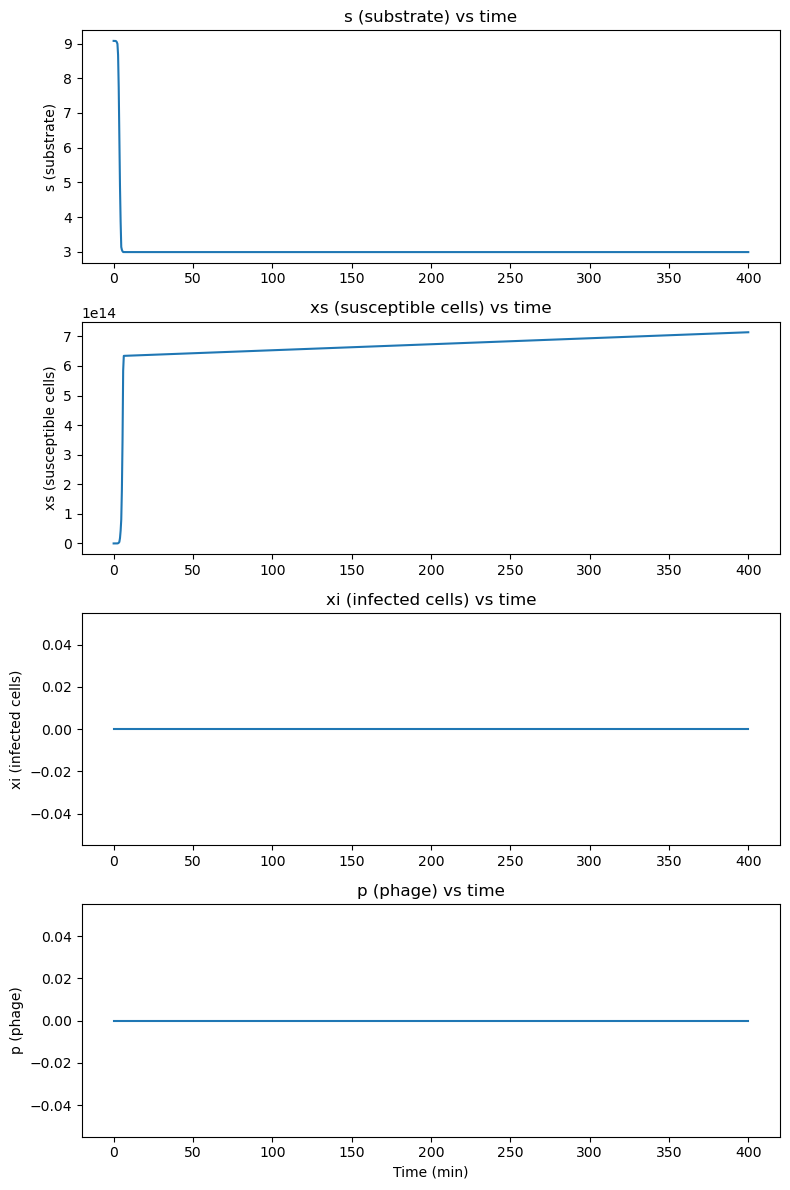

In [328]:
# Solve the system
yy = ddeint(model, g, tt, fargs=(delta, tau, beta, mu_max, ks, kla, cgl, mo, Yxo))
yy[yy < 0] = 0

# Plot s, xs, xi, and p against time in separate subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 12))
 
# Plot s vs time
axs[0].plot(tt, yy[:,0])
axs[0].set_title('s (substrate) vs time')
axs[0].set_ylabel('s (substrate)')
 
# Plot xs vs time
axs[1].plot(tt, yy[:, 1])
axs[1].set_title('xs (susceptible cells) vs time')
axs[1].set_ylabel('xs (susceptible cells)')
 
# Plot xi vs time
axs[2].plot(tt, yy[:, 2])
axs[2].set_title('xi (infected cells) vs time')
axs[2].set_ylabel('xi (infected cells)')
 
# Plot p vs time
axs[3].plot(tt, yy[:, 3])
axs[3].set_title('p (phage) vs time')
axs[3].set_ylabel('p (phage)')
axs[3].set_xlabel('Time (min)')
 
# Adjust the layout
plt.tight_layout()
plt.show()

# Initial conditions second calculation
Need to make it clearer, but will not change the code myself

In [329]:
# Initial conditions function for the second run, using the last state of the first run (basically last value of the function at timepoint 420 min)
#g = lambda t: array([yy[-1, 0], yy[-1, 1], yy[-1, 2], yy[-1, 3]])
g = lambda t: array([yy[-1, 0], yy[-1, 1], 0, 10**6])

# Time range
tt = linspace(440, 660, 1000)
# tt = linspace(5, 30, 26)

# Plot the second situation

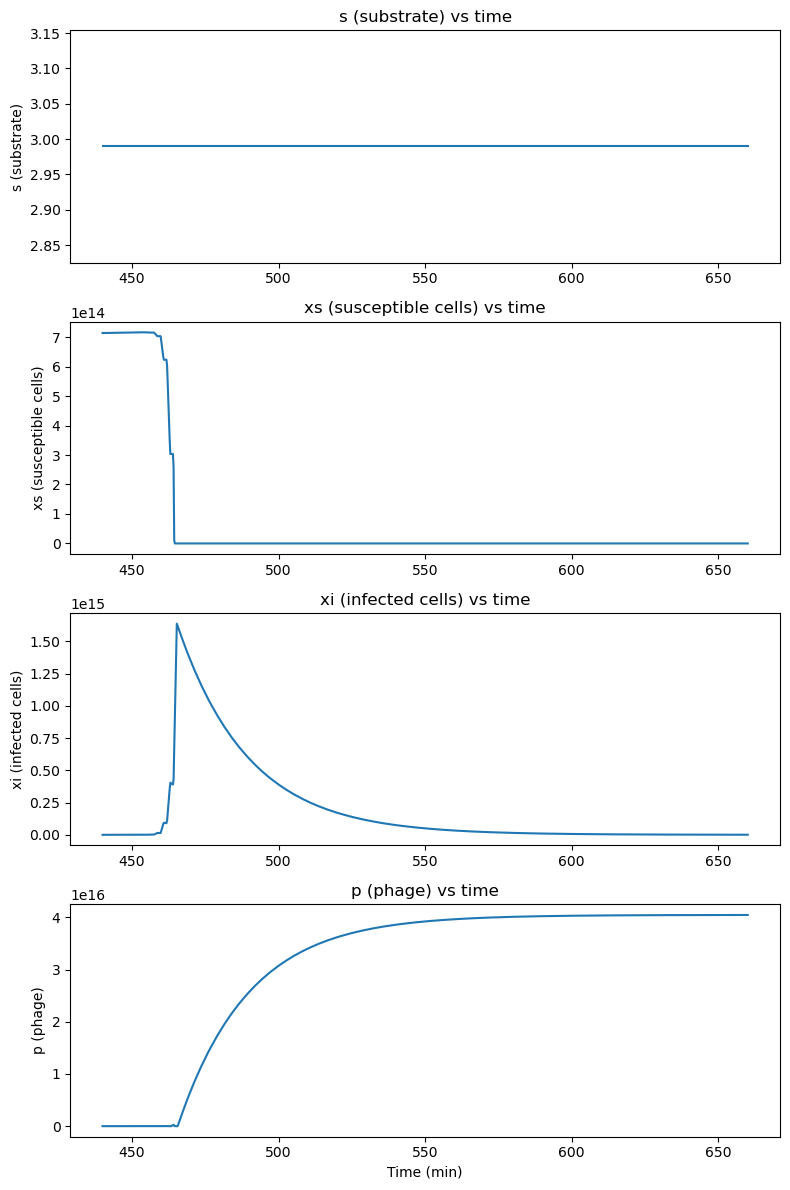

In [330]:
# Solve the system
yy = ddeint(model, g, tt, fargs=(delta, tau, beta, mu_max, ks, kla, cgl, mo, Yxo))
yy[yy < 0] = 0

# Plot s, xs, xi, and p against time in separate subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 12))
 
# Plot s vs time
axs[0].plot(tt, yy[:, 0])
axs[0].set_title('s (substrate) vs time')
axs[0].set_ylabel('s (substrate)')
 
# Plot xs vs time
axs[1].plot(tt, yy[:, 1])
axs[1].set_title('xs (susceptible cells) vs time')
axs[1].set_ylabel('xs (susceptible cells)')
 
# Plot xi vs time
axs[2].plot(tt, yy[:, 2])
axs[2].set_title('xi (infected cells) vs time')
axs[2].set_ylabel('xi (infected cells)')
 
# Plot p vs time
axs[3].plot(tt, yy[:, 3])
axs[3].set_title('p (phage) vs time')
axs[3].set_ylabel('p (phage)')
axs[3].set_xlabel('Time (min)')
 
# Adjust the layout
plt.tight_layout()
plt.show()